### Problem Statement: Flipkart Products Price Prediction

#### 1. Data Ingestion:
###### Data Acquired from "https://www.kaggle.com/datasets/atharvjairath/flipkart-ecommerce-dataset"

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [52]:
df = pd.read_csv("flipkart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

#### 1.1 Data Preparation

In [53]:
df.shape

(20002, 15)

In [54]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [55]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

#### Insight: 'retail_price' will be the target feature

#### 1.2. Data Wrangling

In [56]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19997    False
19998    False
19999    False
20000    False
20001     True
Length: 20002, dtype: bool

In [57]:
#check for null values
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [58]:
# separate the features as categorical and numerical
categorical = list(df.select_dtypes(include='O').columns)
categorical

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications']

In [59]:
numerical = list(df.select_dtypes(exclude='O').columns)
numerical

['retail_price', 'discounted_price']

<Axes: >

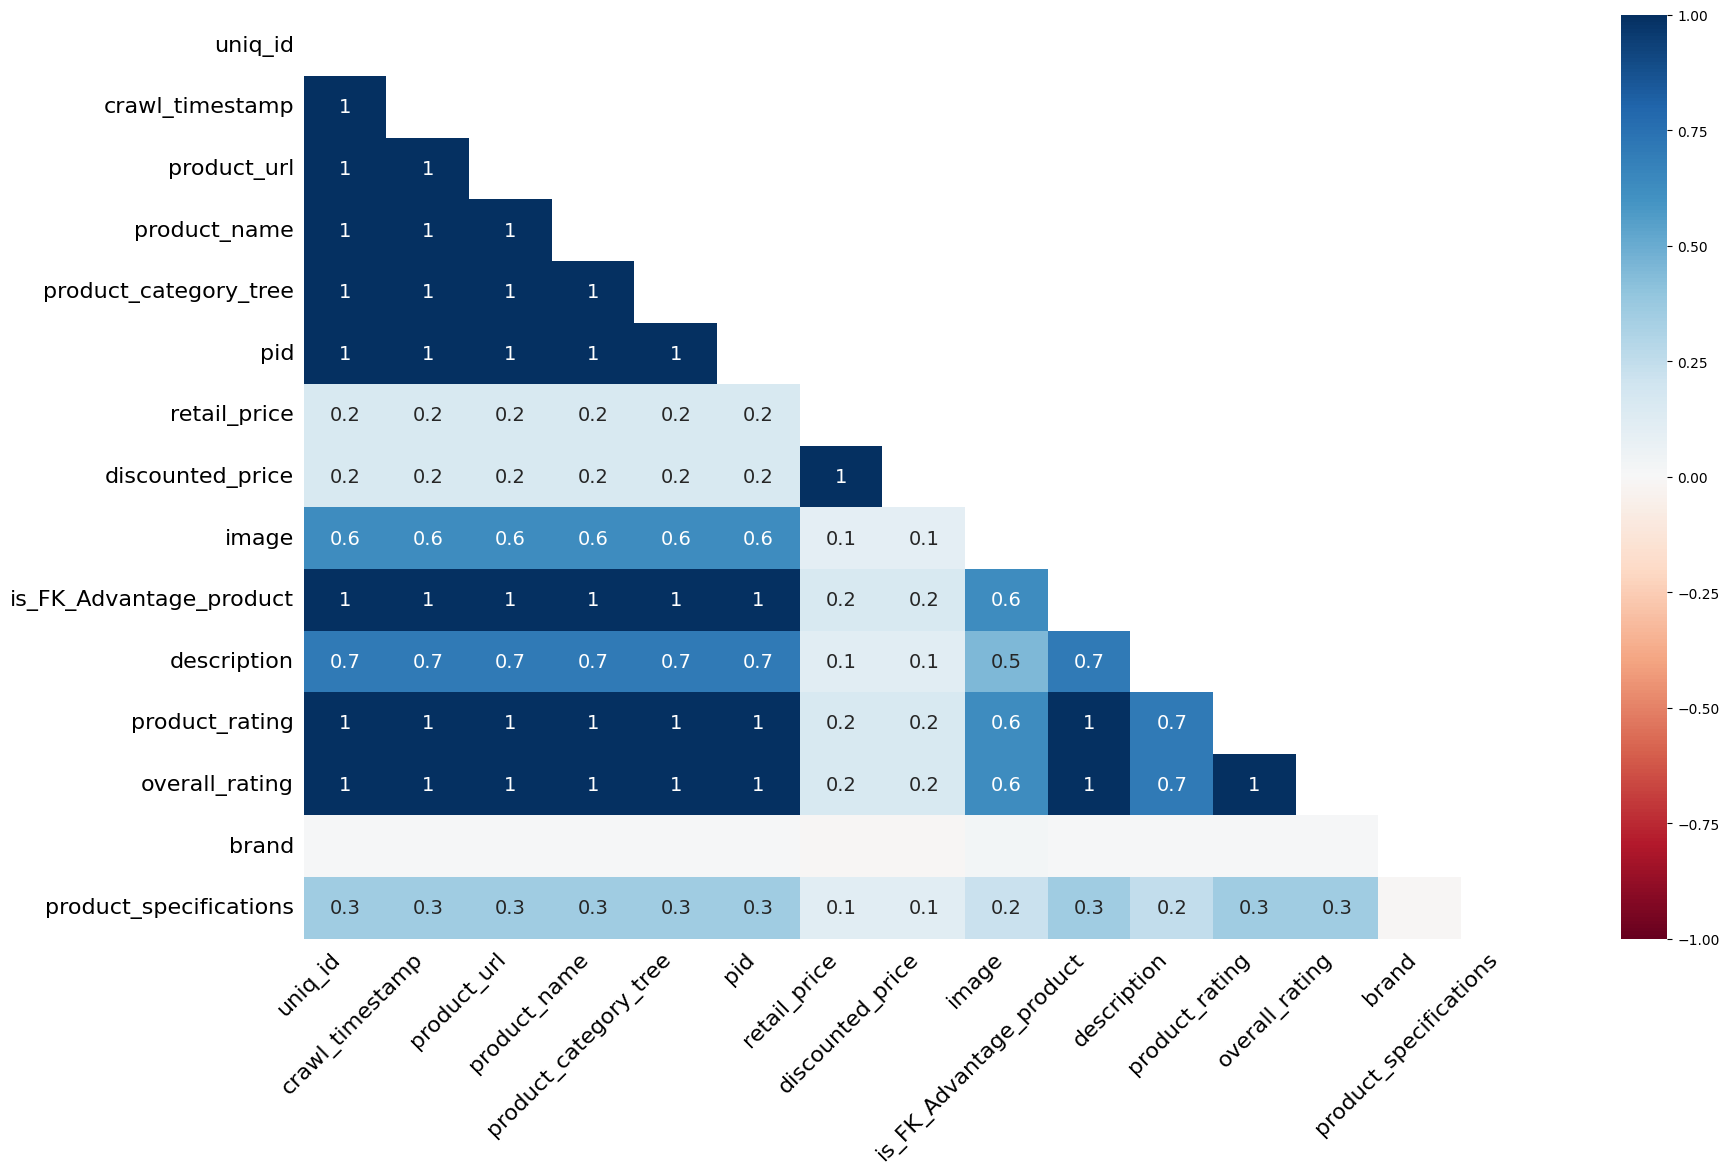

In [11]:
# visualizing the locations of missing values as correlation matrix 
msno.heatmap(df)

In [60]:
# statistical description of the numerical features
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
retail_price,19922.0,2979.206104,9009.639341,35.0,666.0,1040.0,1999.0,571230.0
discounted_price,19922.0,1973.401767,7333.586040,35.0,350.0,550.0,999.0,571230.0


In [61]:
# fill the null values of the numerical features(Series) with mean of each feature(Series)
for col in df[numerical]:
    df[col]=df[col].fillna(df[col].mean())

In [62]:
df[numerical].isnull().sum()

retail_price        0
discounted_price    0
dtype: int64

In [63]:
# fill the null values of the categorical features(Series) with the most frequent value in each feature
for col in df[categorical]:
    df[col]=df[col].fillna(df[col].mode()[0])

In [64]:
df[categorical].isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [65]:
df.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

#### 2 Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Retail Price'}, xlabel='retail_price', ylabel='Count'>

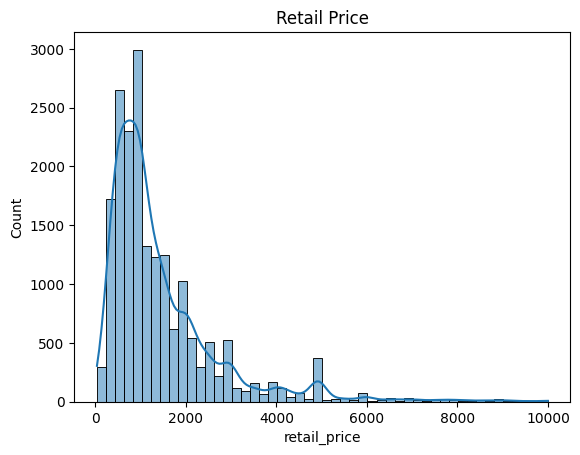

In [14]:
plt.title("Retail Price")
sns.histplot(df.retail_price[df.retail_price < 10000], kde=True, bins = 50)

##### Insight: retail_price is long tail and has to be normalized

<Axes: title={'center': 'Discounted Price'}, xlabel='discounted_price', ylabel='Count'>

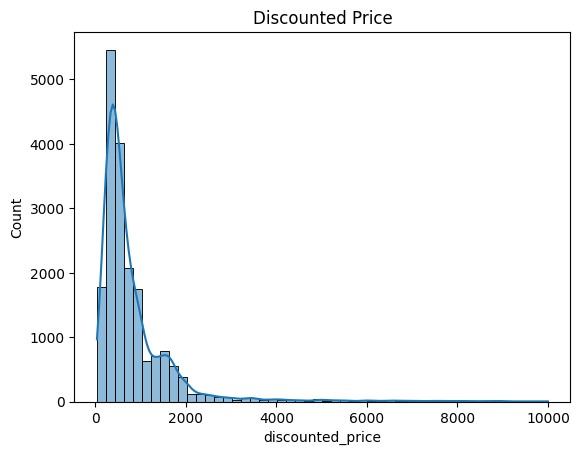

In [18]:
plt.title("Discounted Price")
sns.histplot(df.discounted_price[df.discounted_price < 10000], kde=True, bins = 50)

In [17]:
df.product_rating.unique()

array(['No rating available', '5', '3', '3.6', '3.5', '4.4', '4', '1',
       '2.3', '4.8', '2.7', '4.5', '2.4', '3.2', '4.7', '2', '3.3', '4.3',
       '3.8', '4.2', '3.7', '3.9', '2.5', '3.1', '4.1', '3.4', '4.6',
       '1.5', '2.8', '2.9', '4.9', '2.2', '2.6', '1.3', '1.7', '1.8'],
      dtype=object)

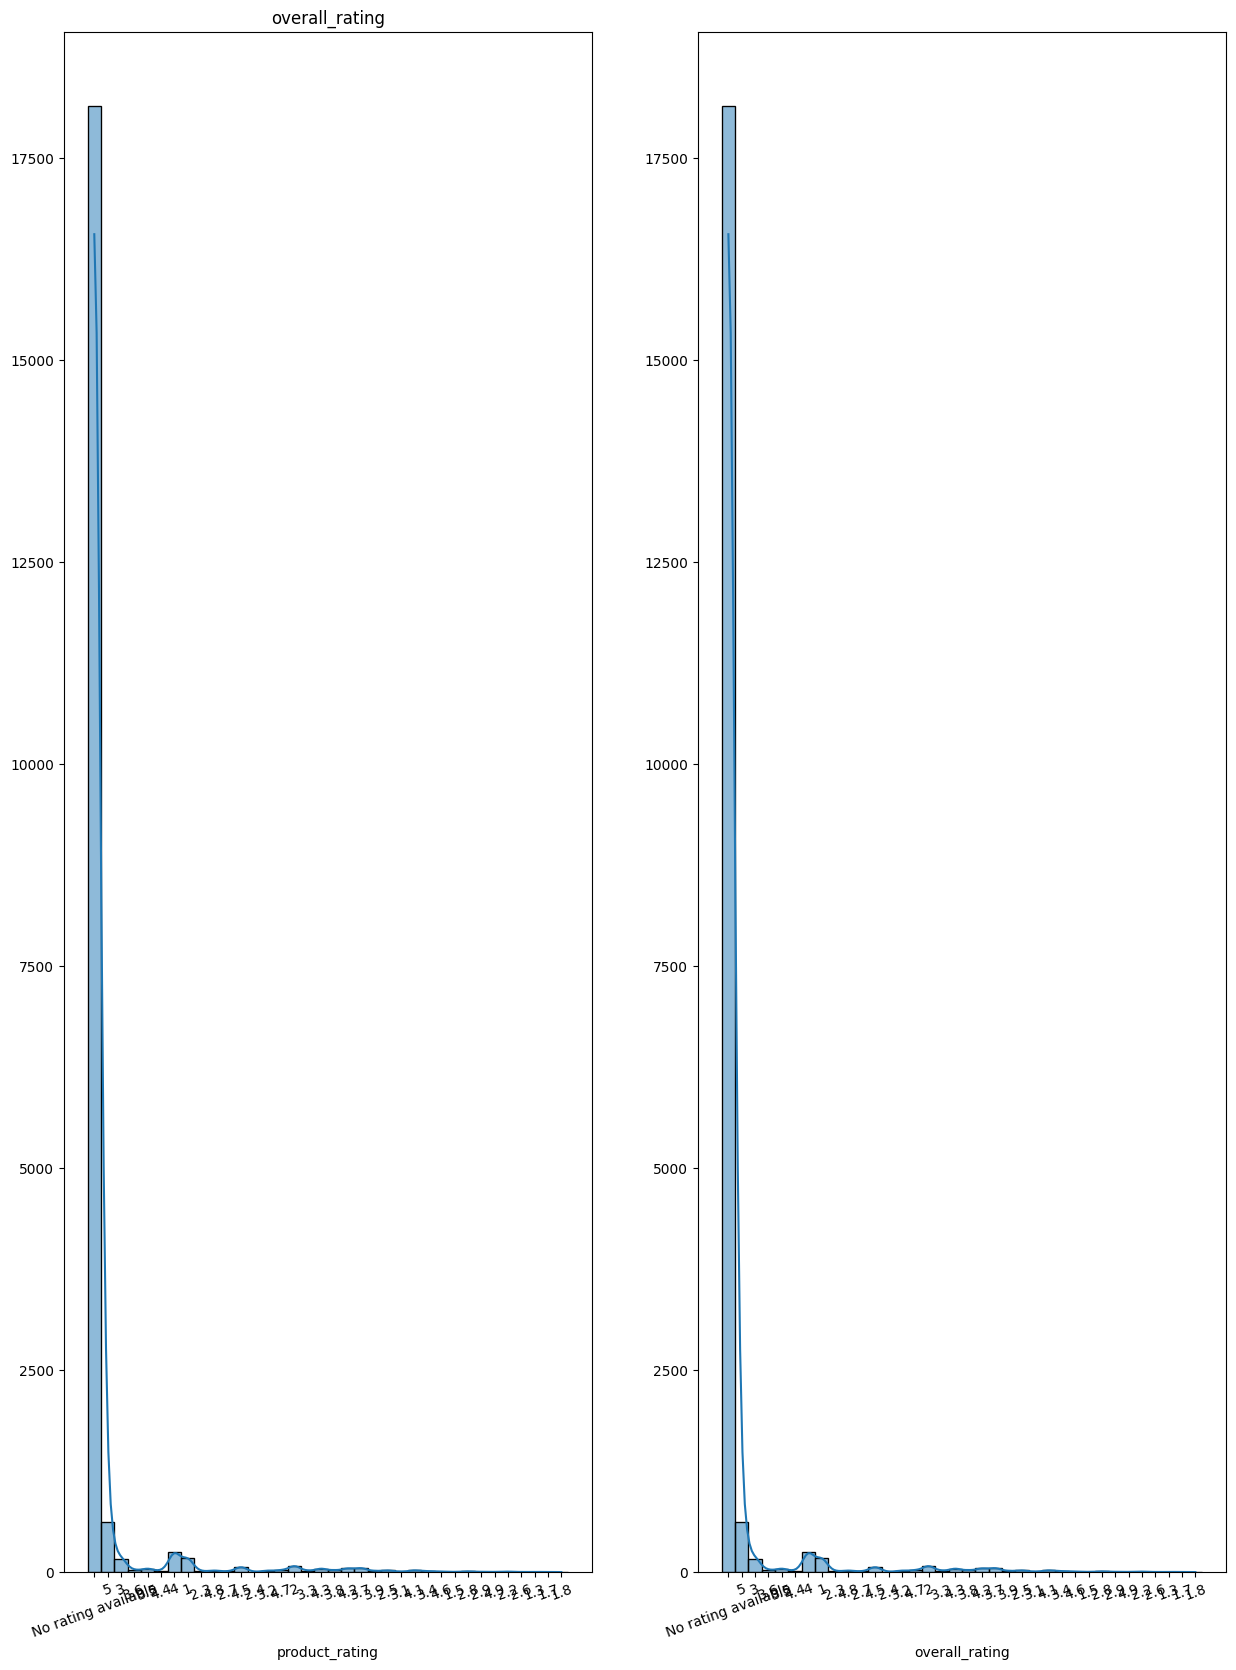

In [18]:
ratings = ['product_rating','overall_rating']

plt.figure(figsize=(15, 20))
j=1
for col in ratings:
    plt.title(col)
    plt.subplot(1,2, j)
    ax = sns.histplot(x = df[col], kde=True,bins=50)
    ax.set( ylabel = None)
    plt.xticks(rotation = 20)
    j += 1

#### 3. Feature Selection

In [18]:
df['retail_price'] = np.log1p(df['retail_price'])

In [66]:
SEED = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [67]:
len(df_full_train), len(df_test), len(df_train), len(df_val), len(df_train) + len(df_val)

(16001, 4001, 12000, 4001, 16001)

In [68]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [69]:
y_train = df_train['retail_price'].values
y_val = df_val['retail_price'].values
y_test = df_test['retail_price'].values

In [70]:
del(df_train['retail_price'])
del(df_val['retail_price'])
del(df_test['retail_price'])

In [71]:
# split the features as categorical and numerical
categorical = [
    'product_category_tree', 'pid','image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'
       ]
numerical= ['discounted_price']

#### 4. Model Training and Hyperparameter Tuning
###### 1.Ridge
###### 2. Gradient Boosting with xgboost

In [72]:
def train(data, y,model):
    dicts = data[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    m = model.fit(X_train, y)

    return dv, m

def predict(data, dv, model):
    dicts = data[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

In [73]:
def model_eval(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = mean_squared_error(true, predicted,squared=False)
    r2 = r2_score(true, predicted)
    return mae,mse, rmse, r2

In [35]:
# Ridge Model
rg = Ridge(alpha=0, solver='sag', random_state=SEED)

In [32]:
dv, model = train(df_train, y_train, rg)

In [33]:
y_pred = predict(df_val, dv, model)
y_pred

array([7.05426017, 7.04679276, 7.01586706, ..., 7.0148111 , 7.03924988,
       7.02567276])

In [34]:
mae,mse, rmse, r2  = model_eval(y_val, y_pred)

In [35]:
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

mae: 0.6153510732610028, mse: 0.6104970558096883, rmse: 0.7813431101697181, r2: 0.42724482956019294


###### Insight: We can see that the model doesn't perform well

#### Hyperparameter Tuning

In [36]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha, solver='sag', random_state=SEED)
    dv, m = train(df_train, y_train, model)
    y_pred = predict(df_val, dv, m)
    mae,mse, rmse, r2 = model_eval(y_val, y_pred)
    print(f'For alpha = {alpha}: \n mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

For alpha = 0: 
 mae: 0.6153510732610028, mse: 0.6104970558096883, rmse: 0.7813431101697181, r2: 0.42724482956019294
For alpha = 0.01: 
 mae: 0.6153510732610028, mse: 0.6104970558096883, rmse: 0.7813431101697181, r2: 0.42724482956019294
For alpha = 0.1: 
 mae: 0.6153510732610028, mse: 0.6104970558096883, rmse: 0.7813431101697181, r2: 0.42724482956019294
For alpha = 1: 
 mae: 0.6153510732611424, mse: 0.610497055809942, rmse: 0.7813431101698805, r2: 0.4272448295599549
For alpha = 10: 
 mae: 0.6153510732625895, mse: 0.6104970558125726, rmse: 0.7813431101715639, r2: 0.42724482955748677


###### Insight: Ridge model doesn't improve after parameter tuning

In [27]:
xgb_params = {
'eta': 0.3, 
'max_depth': 6,
'min_child_weight': 1,

'objective': 'reg:squarederror',
'nthread': 8,

'seed': 1,
'verbosity': 1,
}
num_round = 100

In [30]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [33]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [34]:
# RandomForestRegressor()
bst = xgb.train(xgb_params, dtrain, num_round)
y_pred = bst.predict(dval)
y_pred

array([7.264838 , 7.5930915, 5.8366876, ..., 6.038742 , 6.886991 ,
       6.0766554], dtype=float32)

In [35]:
mae,mse, rmse, r2  = model_eval(y_val, y_pred)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

mae: 0.21827048713252456, mse: 0.08824871071633049, rmse: 0.2970668455353618, r2: 0.9172069629715273


###### Insight: xgboost performs better than Ridge

##### Hyperparameter Tuning

In [38]:
xgb_params = {
    'eta': 0.2, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

gb = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5)
y_pred = gb.predict(dval)
y_pred

array([7.1461983, 7.5823436, 5.861604 , ..., 6.1475883, 6.8818493,
       6.1227527], dtype=float32)

In [39]:
mae,mse, rmse, r2  = model_eval(y_val, y_pred)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

mae: 0.22710987276089994, mse: 0.09325983073231384, rmse: 0.3053847257678646, r2: 0.912505638253356


In [42]:
for eta in [0.4, 0.3, 0.2, 0.1]:
    for d in [1, 3, 6, 10]:
        for c in [1, 2, 5, 9]:
            xgb_params = {
                'eta': eta, 
                'max_depth': d,
                'min_child_weight': c,

                'objective': 'reg:squarederror',
                'nthread': 8,

                'seed': 1,
                'verbosity': 1,
            }

            gb = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5)
            y_pred = gb.predict(dval)
            mae,mse, rmse, r2  = model_eval(y_val, y_pred)
            print(f'For eta={eta}, max_depth={d} & min_child_weight={c} \n mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

For eta=0.4, max_depth=1 & min_child_weight=1 
 mae: 0.2846032588366614, mse: 0.13168596832069787, rmse: 0.36288561327324326, r2: 0.8764550647504442
For eta=0.4, max_depth=1 & min_child_weight=2 
 mae: 0.2846032588366614, mse: 0.13168596832069787, rmse: 0.36288561327324326, r2: 0.8764550647504442
For eta=0.4, max_depth=1 & min_child_weight=5 
 mae: 0.28461718988905615, mse: 0.1324824736057663, rmse: 0.36398141931390715, r2: 0.875707800671176
For eta=0.4, max_depth=1 & min_child_weight=9 
 mae: 0.28399873604401715, mse: 0.13281910672104702, rmse: 0.3644435576616042, r2: 0.8753919787429891
For eta=0.4, max_depth=3 & min_child_weight=1 
 mae: 0.24122060647053722, mse: 0.10063813447663114, rmse: 0.31723514067112923, r2: 0.9055834728171471
For eta=0.4, max_depth=3 & min_child_weight=2 
 mae: 0.2399588159456368, mse: 0.09994101398853175, rmse: 0.31613448718627923, r2: 0.9062374962234498
For eta=0.4, max_depth=3 & min_child_weight=5 
 mae: 0.2369966915244584, mse: 0.10030161548525998, rmse: 0

#### Insight: 
###### We can see that the model perfoms well at eta=0.4, max_depth=10 & min_child_weight=2  
###### xgboost will be chosen as the final model

In [83]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train['retail_price'].values
del(df_full_train['retail_price'])

In [84]:
opt_params = {
'eta': 0.4, 
'max_depth': 10,
'min_child_weight': 2,

'objective': 'reg:squarederror',
'nthread': 8,

'seed': 1,
'verbosity': 1,
}
num_round = 100

In [85]:
train_full_dicts = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_full_train = dv.fit_transform(train_full_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [89]:
d_full_train = xgb.DMatrix(X_full_train, label=y_full_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [90]:
xgbst = xgb.train(opt_params, d_full_train, num_round)
y_pred = xgbst.predict(dtest)
y_pred

array([ 1270.958  ,   967.4572 ,  1137.0881 , ..., 23851.635  ,
         860.51166,   873.7155 ], dtype=float32)

In [91]:
mae,mse, rmse, r2 = model_eval(y_test, y_pred)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')

mae: 499.1793620482253, mse: 14012664.056297751, rmse: 3743.3493099492803, r2: 0.8174697699435021


In [43]:
import pickle